<a href="https://colab.research.google.com/github/iamtatha/Mental-Health/blob/main/nn.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Importing Libraries

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
import keras
import tensorflow as tf
from keras.models import Sequential
from keras.layers import Dense
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix
from sklearn.metrics import roc_curve, auc
from sklearn.decomposition import PCA

Importing Dataset

In [ ]:
# X_values = pd.read_csv('https://raw.githubusercontent.com/iamtatha/Mental-Health/main/Data/all_label_train.csv')
# Y_values = pd.read_csv('https://raw.githubusercontent.com/iamtatha/Mental-Health/main/Data/all_label_target.csv')

X_values = pd.read_csv('https://raw.githubusercontent.com/iamtatha/Mental-Health/main/Data/train.csv')
Y_values = pd.read_csv('https://raw.githubusercontent.com/iamtatha/Mental-Health/main/Data/target.csv')


df = pd.concat([X_values, Y_values],axis=1)

scaled_data = df
# scaler = MinMaxScaler(feature_range=(0,1))
# scaled_data = pd.DataFrame(scaler.fit_transform(scaled_data))

X_train, X_test, Y_train, Y_test = train_test_split(scaled_data.iloc[:,:-1], scaled_data.iloc[:,-1], train_size=0.90)
n = np.array(X_train).shape[1]

PCA

In [ ]:
pca = PCA(n_components = 'mle')
X_train = pca.fit_transform(X_train)
X_test = pca.transform(X_test)
n = np.array(X_train).shape[1]
print(n)

41


Building the Neural Network

In [ ]:
model = Sequential()
model.add(Dense(20, input_dim = n, activation = 'relu'))
model.add(Dense(10, activation = 'relu'))
model.add(Dense(1, activation = 'sigmoid'))

model.compile(loss='categorical_crossentropy', optimizer='RMSprop', metrics=['accuracy', 'mse'])

Training the Model

In [ ]:
learnt = model.fit(X_train, Y_train, epochs=100, batch_size=64)

Epoch 1/100
18/18 [==============================] - 1s 2ms/step - loss: 0.0000e+00 - accuracy: 0.5322 - mse: 0.4351
Epoch 2/100
18/18 [==============================] - 0s 2ms/step - loss: 0.0000e+00 - accuracy: 0.4890 - mse: 0.5091
Epoch 3/100
18/18 [==============================] - 0s 2ms/step - loss: 0.0000e+00 - accuracy: 0.4890 - mse: 0.5110
Epoch 4/100
18/18 [==============================] - 0s 2ms/step - loss: 0.0000e+00 - accuracy: 0.4890 - mse: 0.5110
Epoch 5/100
18/18 [==============================] - 0s 2ms/step - loss: 0.0000e+00 - accuracy: 0.4890 - mse: 0.5110
Epoch 6/100
18/18 [==============================] - 0s 3ms/step - loss: 0.0000e+00 - accuracy: 0.4890 - mse: 0.5110
Epoch 7/100
18/18 [==============================] - 0s 2ms/step - loss: 0.0000e+00 - accuracy: 0.4890 - mse: 0.5110
Epoch 8/100
18/18 [==============================] - 0s 2ms/step - loss: 0.0000e+00 - accuracy: 0.4890 - mse: 0.5110
Epoch 9/100
18/18 [==============================] - 0s 2ms/step

In [ ]:
Y_pred = model.predict(X_test)
X = []
for i in range(len(list(Y_pred))):
  X.append(i+1)

# plt.scatter(X, Y_pred, label = 'Predicted')
# plt.scatter(X, Y_test, label = 'Actual')
# plt.legend()
# plt.show()

4/4 [==============================] - 0s 3ms/step


Calculating Accuracy

In [ ]:
n = Y_pred.shape[0]
Error = 0
l = []
for i in Y_pred:
  l.append(i[0])
Y_pred = np.array(l)
Y_test = list(Y_test)
Wrong_y = []
Right_y = []

for i in range(len(Y_pred)):
  Error += abs(int(Y_pred[i]) - int(Y_test[i]))
  if (int(Y_pred[i]) != int(Y_test[i])):
    Wrong_y.append(int(Y_test[i]))
  else:
    Right_y.append(int(Y_test[i]))

acc = 1 - Error/n
print("Accuracy is: ", acc)

Accuracy is:  0.626984126984127


Confusion Matrix

In [ ]:
confusion = [[Right_y.count(1), Wrong_y.count(1)] ,[Wrong_y.count(0), Right_y.count(0)]]
confusion = pd.DataFrame(confusion)
confusion.columns = ["Predicted y=1", "Predicted y=0"]
confusion.index = ["Actual y=1", "Actual y=0"]
print(confusion)

            Predicted y=1  Predicted y=0
Actual y=1              0             63
Actual y=0              0             63


In [ ]:
zero = list(model.predict(X_train).ravel()).count(0)
tot = len(list(model.predict(X_train).ravel()))
print(tot, zero)

36/36 [==============================] - 0s 2ms/step
1133 1126


In [ ]:
false_pos, true_pos, _ = roc_curve(Y_test, Y_pred)
roc_auc = auc(false_pos, true_pos)

In [ ]:
false_pos, true_pos

(array([0., 1.]), array([0., 1.]))

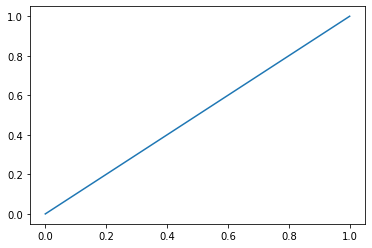

In [ ]:
plt.plot(false_pos, true_pos)
# plt.plot([0,1], [0,1])

In [ ]:
print(accuracy_score(Y_test, Y_pred))
print(precision_score(Y_test, Y_pred))
print(recall_score(Y_test, Y_pred))
print(f1_score(Y_test, Y_pred))
print(confusion_matrix(Y_test, Y_pred))

0.5396825396825397
0.0
0.0
0.0
[[68  0]
 [58  0]]


/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [ ]:
print(accuracy_score(Y_test, Y_pred))
print(precision_score(Y_test, Y_pred))
print(recall_score(Y_test, Y_pred))
print(f1_score(Y_test, Y_pred))
print(confusion_matrix(Y_test, Y_pred))

0.626984126984127
0.0
0.0
0.0
[[79  0]
 [47  0]]


/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
